<a href="https://colab.research.google.com/github/shalini1008/AIMLMonth2023/blob/main/financial_sentiment_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FINACIAL SENTIMENT ANALYSIS**


# DATA FETCHING FROM FINVIZ

In [1]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup

finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['AMZN', 'GOOG', 'NFLX','AAPL']  # ticker is a unique series of letters assigned to a security for trading purposes

news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent': 'my-app'})

    try:
        response = urlopen(req)
        html = BeautifulSoup(response, 'html')
        news_table = html.find(id='news-table')
        news_tables[ticker] = news_table
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")




# DATA CLEANING

In [2]:
parsed_data = []

for ticker, news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        if row.a is not None:
            title = row.a.get_text()
            date_data = row.td.text.split(' ')
            date_data = list(filter(lambda x: x.strip() != '', date_data))  # Remove empty strings
            if len(date_data) == 1:
                time = date_data[0].strip()
            else:
                date = date_data[0].strip()
                time = date_data[1].strip()

            parsed_data.append([ticker, date, time, title])
        else:
            title = "Default value"
            parsed_data.append([ticker, "", "", title])

print(parsed_data)


[['AMZN', 'Today', '03:29PM', 'Amazon temporarily halts drone deliveries from two facilities'], ['AMZN', 'Today', '02:47PM', 'Did Billionaire Chen Tianqiao Dump or Bet on Amazon.com, Inc. (AMZN)?'], ['AMZN', 'Today', '12:12PM', 'Amazon Stock Climbs as Analysts Predict $245 by 2025'], ['AMZN', 'Today', '11:03AM', 'Raymond James says AI and HardTech to drive growth in 2025'], ['AMZN', 'Today', '10:38AM', "Insiders question Zuckerberg's Trump-era Meta-morphosis: 'He's a chameleon'"], ['AMZN', 'Today', '10:00AM', 'IMDb Announces Leadership Transition as Company Marks 35th Anniversary'], ['AMZN', 'Today', '08:39AM', 'Nancy Pelosi Buys Alphabet, Amazon Calls While Selling Apple, Nvidia Shares'], ['AMZN', 'Today', '07:52AM', 'MAGA Returns to Washington With Mood-Boosting Mocktails, Meme Coins and Paella'], ['AMZN', 'Today', '06:00AM', 'Oil Majors Flirt With Electricity'], ['AMZN', 'Jan-20-25', '09:25PM', 'Trumps First Day in Office: Signing Orders, Spinning Yarns, Settling Scores'], ['AMZN', 

DATA CREATING

In [8]:
import pandas as pd
df=pd.DataFrame(parsed_data,columns=['ticker','date','time','title'])
print(df.head())

  ticker   date     time                                              title
0   AMZN  Today  03:29PM  Amazon temporarily halts drone deliveries from...
1   AMZN  Today  02:47PM  Did Billionaire Chen Tianqiao Dump or Bet on A...
2   AMZN  Today  12:12PM  Amazon Stock Climbs as Analysts Predict $245 b...
3   AMZN  Today  11:03AM  Raymond James says AI and HardTech to drive gr...
4   AMZN  Today  10:38AM  Insiders question Zuckerberg's Trump-era Meta-...


# USING LEMMATIZATION




In [3]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [9]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [10]:
print(df['title'])
corpus=[]

0      Amazon temporarily halts drone deliveries from...
1      Did Billionaire Chen Tianqiao Dump or Bet on A...
2      Amazon Stock Climbs as Analysts Predict $245 b...
3      Raymond James says AI and HardTech to drive gr...
4      Insiders question Zuckerberg's Trump-era Meta-...
                             ...                        
395              The TikTok-Ban Saga Takes Another Twist
396    The Man Making Billions From the Wildest Bitco...
397    How a Little-Known Finnish Company Became One ...
398    What will happen to TikTok on Apple and Google...
399    These Stocks Moved the Most Today: Apple, Alph...
Name: title, Length: 400, dtype: object


In [11]:
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['title'][i])
    review = review.lower()
    review = review.split()

    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    print(review)  # Add this line to see the preprocessed review
    corpus.append(review)


amazon temporarily halt drone delivery two facility
billionaire chen tianqiao dump bet amazon com inc amzn
amazon stock climb analyst predict
raymond james say ai hardtech drive growth
insider question zuckerberg trump era meta morphosis chameleon
imdb announces leadership transition company mark th anniversary
nancy pelosi buy alphabet amazon call selling apple nvidia share
maga return washington mood boosting mocktails meme coin paella
oil major flirt electricity
trump first day office signing order spinning yarn settling score
trump inauguration fashion mean business
tech elite take center stage trump inauguration
amazon com amzn among billionaire louis bacon long term stock pick
trump evolving relationship big tech trend watch
trump call revolution common sense inaugural address
amazon com inc amzn attracting investor attention know
brainer technology stock buy right
alibaba group holding limited baba bull case theory
nvidia ceo jensen huang trump inauguration
art valuation discove

In [12]:
print(corpus)

['amazon temporarily halt drone delivery two facility', 'billionaire chen tianqiao dump bet amazon com inc amzn', 'amazon stock climb analyst predict', 'raymond james say ai hardtech drive growth', 'insider question zuckerberg trump era meta morphosis chameleon', 'imdb announces leadership transition company mark th anniversary', 'nancy pelosi buy alphabet amazon call selling apple nvidia share', 'maga return washington mood boosting mocktails meme coin paella', 'oil major flirt electricity', 'trump first day office signing order spinning yarn settling score', 'trump inauguration fashion mean business', 'tech elite take center stage trump inauguration', 'amazon com amzn among billionaire louis bacon long term stock pick', 'trump evolving relationship big tech trend watch', 'trump call revolution common sense inaugural address', 'amazon com inc amzn attracting investor attention know', 'brainer technology stock buy right', 'alibaba group holding limited baba bull case theory', 'nvidia c

 #  Creating the Bag of Words model


In [13]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()



In [14]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [15]:
X.shape

(400, 1018)

# USING K-MEANS

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans




# Perform K-Means clustering
k = 3
kmeans = KMeans(n_clusters=k)
cluster_labels = kmeans.fit_predict(X)

cluster_sentiment = {
    0: "positive",
    1: "negative",
    2: "neutral"
}

# Print cluster labels
print(cluster_labels)


[1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 2 0 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 0 1 2 1 1 1
 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 0 1 1 1 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 2 1
 1 1 1 1 1 0 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1]


In [17]:
# Assign sentiments to sentences based on cluster labels
sentiment_predictions = [cluster_sentiment[label] for label in cluster_labels]

In [18]:
# Display sentences and predicted sentiments
for sentence, sentiment in zip(corpus, sentiment_predictions):
    print(f"Sentence: {sentence} - Predicted Sentiment from k-means: {sentiment}")

Sentence: amazon temporarily halt drone delivery two facility - Predicted Sentiment from k-means: negative
Sentence: billionaire chen tianqiao dump bet amazon com inc amzn - Predicted Sentiment from k-means: negative
Sentence: amazon stock climb analyst predict - Predicted Sentiment from k-means: negative
Sentence: raymond james say ai hardtech drive growth - Predicted Sentiment from k-means: negative
Sentence: insider question zuckerberg trump era meta morphosis chameleon - Predicted Sentiment from k-means: negative
Sentence: imdb announces leadership transition company mark th anniversary - Predicted Sentiment from k-means: negative
Sentence: nancy pelosi buy alphabet amazon call selling apple nvidia share - Predicted Sentiment from k-means: negative
Sentence: maga return washington mood boosting mocktails meme coin paella - Predicted Sentiment from k-means: negative
Sentence: oil major flirt electricity - Predicted Sentiment from k-means: negative
Sentence: trump first day office si

# IMPLEMENTATION OF SENTIMENT ANALYSIS(using vader tool of NLTK)

In [19]:
!pip install nltk
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd


In [20]:
df=pd.DataFrame(parsed_data,columns=['ticker','date','time','title'])
print(df.head())

  ticker   date     time                                              title
0   AMZN  Today  03:29PM  Amazon temporarily halts drone deliveries from...
1   AMZN  Today  02:47PM  Did Billionaire Chen Tianqiao Dump or Bet on A...
2   AMZN  Today  12:12PM  Amazon Stock Climbs as Analysts Predict $245 b...
3   AMZN  Today  11:03AM  Raymond James says AI and HardTech to drive gr...
4   AMZN  Today  10:38AM  Insiders question Zuckerberg's Trump-era Meta-...


In [21]:
nltk.download('vader_lexicon')
vader = SentimentIntensityAnalyzer()
print(df['title'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


0      Amazon temporarily halts drone deliveries from...
1      Did Billionaire Chen Tianqiao Dump or Bet on A...
2      Amazon Stock Climbs as Analysts Predict $245 b...
3      Raymond James says AI and HardTech to drive gr...
4      Insiders question Zuckerberg's Trump-era Meta-...
                             ...                        
395              The TikTok-Ban Saga Takes Another Twist
396    The Man Making Billions From the Wildest Bitco...
397    How a Little-Known Finnish Company Became One ...
398    What will happen to TikTok on Apple and Google...
399    These Stocks Moved the Most Today: Apple, Alph...
Name: title, Length: 400, dtype: object


In [22]:
f=lambda title: vader.polarity_scores(title)['compound']
df['compound']=df['title'].apply(f)
print(df.head())

  ticker   date     time                                              title  \
0   AMZN  Today  03:29PM  Amazon temporarily halts drone deliveries from...   
1   AMZN  Today  02:47PM  Did Billionaire Chen Tianqiao Dump or Bet on A...   
2   AMZN  Today  12:12PM  Amazon Stock Climbs as Analysts Predict $245 b...   
3   AMZN  Today  11:03AM  Raymond James says AI and HardTech to drive gr...   
4   AMZN  Today  10:38AM  Insiders question Zuckerberg's Trump-era Meta-...   

   compound  
0    0.1779  
1   -0.3818  
2    0.1779  
3    0.3818  
4    0.0000  


# Visualization Of Data

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
mean_df=df.groupby(['ticker','date']).mean()
print(mean_df)

                  compound
ticker date               
AAPL              0.340000
       Sep-06-23  0.005659
       Sep-07-23 -0.126351
       Today     -0.032260
AMZN              0.340000
       Sep-01-23  0.220246
       Sep-02-23  0.454250
       Sep-03-23  0.059300
       Sep-04-23  0.261900
       Sep-05-23  0.199856
       Sep-06-23  0.148300
       Sep-07-23  0.083719
GOOG              0.340000
       Aug-31-23  0.164220
       Sep-01-23  0.183561
       Sep-02-23  0.190900
       Sep-03-23 -0.025750
       Sep-04-23  0.162400
       Sep-05-23  0.089338
       Sep-06-23  0.120204
       Sep-07-23  0.083717
       Today     -0.340000
NFLX              0.340000
       Aug-16-23 -0.080400
       Aug-17-23  0.177350
       Aug-18-23  0.105612
       Aug-19-23  0.585900
       Aug-21-23 -0.057867
       Aug-22-23 -0.216200
       Aug-23-23  0.074770
       Aug-24-23  0.236533
       Aug-25-23  0.252500
       Aug-27-23  0.402500
       Aug-28-23 -0.012620
       Aug-29-23  0.002100
 

<ipython-input-19-361a8c5000f3>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df=df.groupby(['ticker','date']).mean()


<Figure size 1000x800 with 0 Axes>

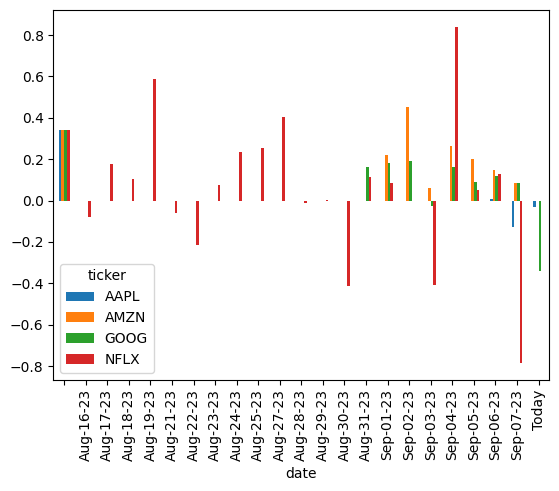

In [ ]:
mean_df=mean_df.unstack()
mean_df=mean_df.xs('compound',axis="columns").transpose()
mean_df.plot(kind='bar')
plt.show()

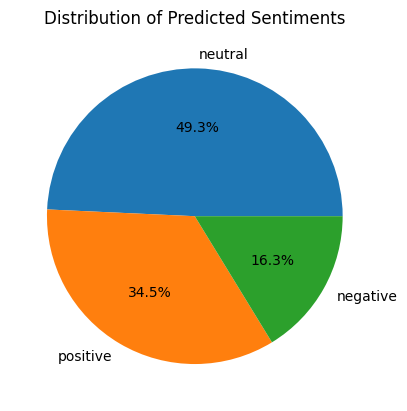

In [ ]:
# Count the occurrences of each predicted sentiment
sentiment_counts = pd.Series(sentiment_predictions).value_counts()

# Create a pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Predicted Sentiments')
plt.show()


# Word Embedding Techniques using Embedding Layer in Keras

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot

In [ ]:
#instance for title column if df
sent=df['title']

In [ ]:
sent

0      TikToks New Amazon Copycat Is Full of Cheap Ch...
1      Nielsen Wont Incorporate Amazons Data on Thurs...
2      Amazon (AMZN) Gains As Market Dips: What You S...
3      Amazon faces shareholder lawsuit over satellit...
4      Analyst who owns shares says this is when you ...
                             ...                        
407    What a strong U.S. dollar means for certain co...
408    Apple slides on report China bans government s...
409    US STOCKS-Wall St slides on renewed inflation ...
410    EU Says Apple and Amazon Among Big Tech 'Gatek...
411    Chip Designer Arm Locks Apple As A Customer Un...
Name: title, Length: 412, dtype: object

In [ ]:
## Vocabulary Size
voc_size=10000

### One Hot Representation

In [ ]:
one_hot_repr=[one_hot(words,voc_size) for words in sent]
print(one_hot_repr)

[[6870, 5344, 2805, 5184, 153, 295, 9500, 8910, 3586], [6637, 2530, 6635, 4905, 1012, 1321, 744, 4971, 9540, 2746], [39, 1348, 6464, 4907, 4215, 5171, 6091, 4135, 5918, 333], [39, 1786, 218, 7317, 7976, 4001, 9317, 8901, 9616, 712, 1786], [1819, 7070, 9189, 4641, 2609, 2340, 5184, 3351, 4135, 7645, 7211, 39, 6563], [9121, 1211], [6036, 2970, 924, 8421, 1321, 39, 8381, 1861, 2280, 2251, 4135, 2609, 2413], [704, 9641, 2786, 1219, 7276, 1899, 5816, 3714, 1321, 9429, 2340, 6243], [467, 6563, 3317, 1321, 1350, 8910, 1214, 4031, 7092, 2546, 7892, 5275], [66, 7829, 9770, 5634, 6678, 1596, 2789], [4339, 3281, 1401, 1851, 1048, 3687, 2566, 1321, 39, 4082, 2429, 2340, 7794], [701, 3896, 6727, 7645, 5133, 8582, 5996, 8060, 4662], [470, 4663, 2648, 5179, 1321, 7634, 7725, 5213], [6091, 2308, 1366, 9139, 8233, 4929, 9252, 8381, 7522, 7100, 7029, 7725, 2074, 9879, 9842, 5617, 2340, 8856, 7970, 6563], [6036, 6797, 3868, 6727, 7029, 5731, 5492, 6540, 254], [39, 6563, 4501, 9733, 4229], [9121, 1211], [

### Word Embedding Representation

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
import numpy as np

In [ ]:
sent_length=20
embedded_docs=pad_sequences(one_hot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 9500 8910 3586]
 [   0    0    0 ... 4971 9540 2746]
 [   0    0    0 ... 4135 5918  333]
 ...
 [   0    0    0 ... 1012 7725 9527]
 [   0    0    0 ... 2786 6066 1313]
 [   0    0    0 ... 8165 6598 5290]]


In [ ]:
dim=10

In [ ]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            400000    
                                                                 
Total params: 400,000
Trainable params: 400,000
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(model.predict(embedded_docs))

13/13 [==============================] - 0s 2ms/step
[[[ 0.01162585 -0.03391006 -0.04876583 ...  0.01251246  0.00539432
    0.02724692]
  [ 0.01162585 -0.03391006 -0.04876583 ...  0.01251246  0.00539432
    0.02724692]
  [ 0.01162585 -0.03391006 -0.04876583 ...  0.01251246  0.00539432
    0.02724692]
  ...
  [-0.00231273 -0.01858276  0.01799029 ...  0.00058438 -0.01185425
   -0.01223372]
  [ 0.00422212  0.03368292  0.03733282 ... -0.02011834  0.03007433
    0.00951799]
  [ 0.00467212 -0.0366053   0.00956831 ... -0.00790112 -0.00696804
   -0.00051159]]

 [[ 0.01162585 -0.03391006 -0.04876583 ...  0.01251246  0.00539432
    0.02724692]
  [ 0.01162585 -0.03391006 -0.04876583 ...  0.01251246  0.00539432
    0.02724692]
  [ 0.01162585 -0.03391006 -0.04876583 ...  0.01251246  0.00539432
    0.02724692]
  ...
  [-0.02709199 -0.02523273 -0.01782827 ... -0.02535226 -0.03764793
    0.03217996]
  [-0.00431141  0.00864718 -0.04328196 ... -0.01254553 -0.01932182
    0.03739433]
  [-0.03987248 -0.03

In [ ]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       6870, 5344, 2805, 5184,  153,  295, 9500, 8910, 3586], dtype=int32)

In [ ]:
print(model.predict(embedded_docs)[0])

13/13 [==============================] - 0s 1ms/step
[[ 1.16258487e-02 -3.39100584e-02 -4.87658270e-02 -2.63477452e-02
  -1.41446590e-02 -4.90667820e-02  8.66706297e-03 -2.75080558e-02
   3.88942473e-02  4.63273786e-02 -1.29742511e-02  5.45013696e-04
   1.46859027e-02 -4.23600450e-02 -1.55944005e-02 -3.13118324e-02
  -4.27015685e-02 -1.57405734e-02  4.43575718e-02 -4.50252555e-02
  -4.00229916e-02  2.05042213e-03  3.39105837e-02  2.81480886e-02
  -4.50735204e-02 -4.57138419e-02 -2.82728560e-02 -2.54649166e-02
  -3.65687013e-02  1.49304532e-02  6.00188971e-03  1.82103254e-02
   4.06846516e-02  3.77761982e-02  3.96265872e-02  2.60188431e-03
   1.86133869e-02  1.25124566e-02  5.39431721e-03  2.72469185e-02]
 [ 1.16258487e-02 -3.39100584e-02 -4.87658270e-02 -2.63477452e-02
  -1.41446590e-02 -4.90667820e-02  8.66706297e-03 -2.75080558e-02
   3.88942473e-02  4.63273786e-02 -1.29742511e-02  5.45013696e-04
   1.46859027e-02 -4.23600450e-02 -1.55944005e-02 -3.13118324e-02
  -4.27015685e-02 -1.5

# Recurrent Neural Network (RNN)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [ ]:
# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=voc_size, output_dim=embedding_vector_features, input_length=sent_length))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(3, activation='softmax'))  # 3 classes for positive, negative, and neutral
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
one_hot_labels = to_categorical(cluster_labels, num_classes=3)
y = one_hot_labels
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            400000    
                                                                 
 lstm (LSTM)                 (None, 20, 64)            26880     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 460,099
Trainable params: 460,099
Non-trainable params: 0
_________________________________________________________________


In [ ]:
len(embedded_docs),y.shape
X_final=np.array(embedded_docs)
Y_final=np.array(y)
X_final.shape,Y_final.shape
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.33, random_state=42)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
5/5 [==============================] - 13s 916ms/step - loss: 1.0880 - accuracy: 0.4348 - val_loss: 1.0653 - val_accuracy: 0.4853
Epoch 2/10
5/5 [==============================] - 1s 122ms/step - loss: 1.0401 - accuracy: 0.4964 - val_loss: 1.0100 - val_accuracy: 0.4853
Epoch 3/10
5/5 [==============================] - 0s 90ms/step - loss: 0.9705 - accuracy: 0.4964 - val_loss: 1.0340 - val_accuracy: 0.4853
Epoch 4/10
5/5 [==============================] - 0s 90ms/step - loss: 0.9579 - accuracy: 0.5036 - val_loss: 0.9844 - val_accuracy: 0.5294
Epoch 5/10
5/5 [==============================] - 0s 105ms/step - loss: 0.9019 - accuracy: 0.6123 - val_loss: 0.9633 - val_accuracy: 0.5294
Epoch 6/10
5/5 [==============================] - 1s 123ms/step - loss: 0.8361 - accuracy: 0.6159 - val_loss: 0.9167 - val_accuracy: 0.5809
Epoch 7/10
5/5 [==============================] - 1s 105ms/step - loss: 0.7206 - accuracy: 0.7645 - val_loss: 0.8787 - val_accuracy: 0.5882
Epoch 8/10
5/5 [=====

In [ ]:
predicted_sentiments = []
for sentence in sent:
    sentence_encoded = [one_hot(sentence, voc_size)]
    sentence_padded = pad_sequences(sentence_encoded, maxlen=sent_length, padding='pre')

    # Using trained model to predict sentiment
    predicted_probabilities = model.predict(sentence_padded)

    # Converting the predicted probabilities to a sentiment label
    predicted_sentiment_label = np.argmax(predicted_probabilities)

    # Maping the numeric sentiment label to its corresponding sentiment class
    sentiment_classes = ['positive', 'negative', 'neutral']
    predicted_sentiment = sentiment_classes[predicted_sentiment_label]

    # Append the predicted sentiment to the list
    predicted_sentiments.append(predicted_sentiment)


1/1 [==============================] - 0s 37ms/step


In [ ]:
# Print the predicted sentiments for all sentences
for sentence, sentiment in zip(sent, predicted_sentiments):
    print(f"Sentence: {sentence} - Predicted Sentiment from RNN: {sentiment}")

Sentence: TikToks New Amazon Copycat Is Full of Cheap Chinese Goods - Predicted Sentiment from RNN: neutral
Sentence: Nielsen Wont Incorporate Amazons Data on Thursday Night Football Viewership - Predicted Sentiment from RNN: positive
Sentence: Amazon (AMZN) Gains As Market Dips: What You Should Know - Predicted Sentiment from RNN: positive
Sentence: Amazon faces shareholder lawsuit over satellite launch contracts with Blue Origin - Predicted Sentiment from RNN: negative
Sentence: Analyst who owns shares says this is when you can sell Amazon stock - Predicted Sentiment from RNN: positive
Sentence: Default value - Predicted Sentiment from RNN: neutral
Sentence: These popular health products on Amazon and Walmart could harm you, says FDA - Predicted Sentiment from RNN: positive
Sentence: Google set to kick off NFL Sunday Ticket on YouTube this weekend - Predicted Sentiment from RNN: neutral
Sentence: Apple stock falls on reports Chinese govt. banning iPhone use for officials - Predicted 

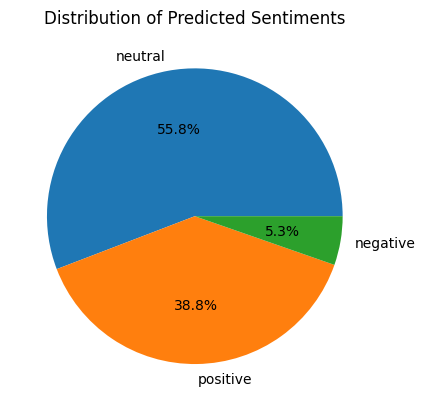

In [ ]:
sentiment_counts = pd.Series(predicted_sentiments).value_counts()

plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Predicted Sentiments')
plt.show()


## Performace Divergence check between Both Models(RNN AND K-MEANS)

In [ ]:

sentences = sent
kmeans_predictions = sentiment_predictions
rnn_predictions = predicted_sentiments

# Create a DataFrame
data = {
    'Sentence': sentences,
    'K-means Prediction': kmeans_predictions,
    'RNN Prediction': rnn_predictions
}

df = pd.DataFrame(data)
df['Predictions Match'] = df['K-means Prediction'] == df['RNN Prediction']
# Display the DataFrame
print(df)


                                              Sentence K-means Prediction  \
0    TikToks New Amazon Copycat Is Full of Cheap Ch...           negative   
1    Nielsen Wont Incorporate Amazons Data on Thurs...           negative   
2    Amazon (AMZN) Gains As Market Dips: What You S...           negative   
3    Amazon faces shareholder lawsuit over satellit...           negative   
4    Analyst who owns shares says this is when you ...           negative   
..                                                 ...                ...   
407  What a strong U.S. dollar means for certain co...            neutral   
408  Apple slides on report China bans government s...           positive   
409  US STOCKS-Wall St slides on renewed inflation ...           positive   
410  EU Says Apple and Amazon Among Big Tech 'Gatek...           negative   
411  Chip Designer Arm Locks Apple As A Customer Un...           positive   

    RNN Prediction  Predictions Match  
0          neutral              Fal

In [ ]:
mismatched_count = df['Predictions Match'].value_counts()
print(mismatched_count)

True     338
False     74
Name: Predictions Match, dtype: int64


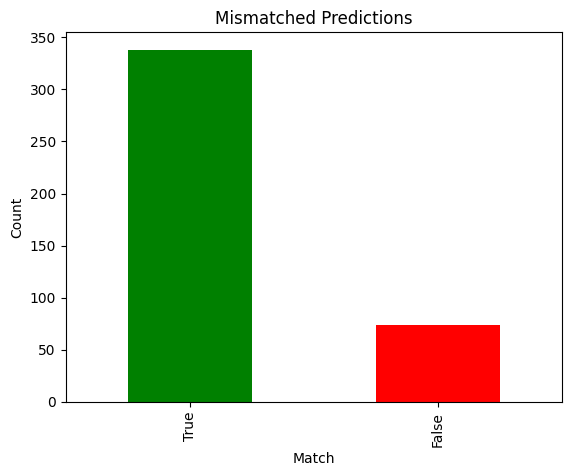

In [ ]:

mismatched_count.plot(kind='bar', color=['green', 'red'])

# Customize the plot
plt.title('Mismatched Predictions')
plt.xlabel('Match')
plt.ylabel('Count')

# Show the plot
plt.show()